In [ ]:
!pip install tensorflow scikit-learn matplotlib

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Skin Cancer</b></div>

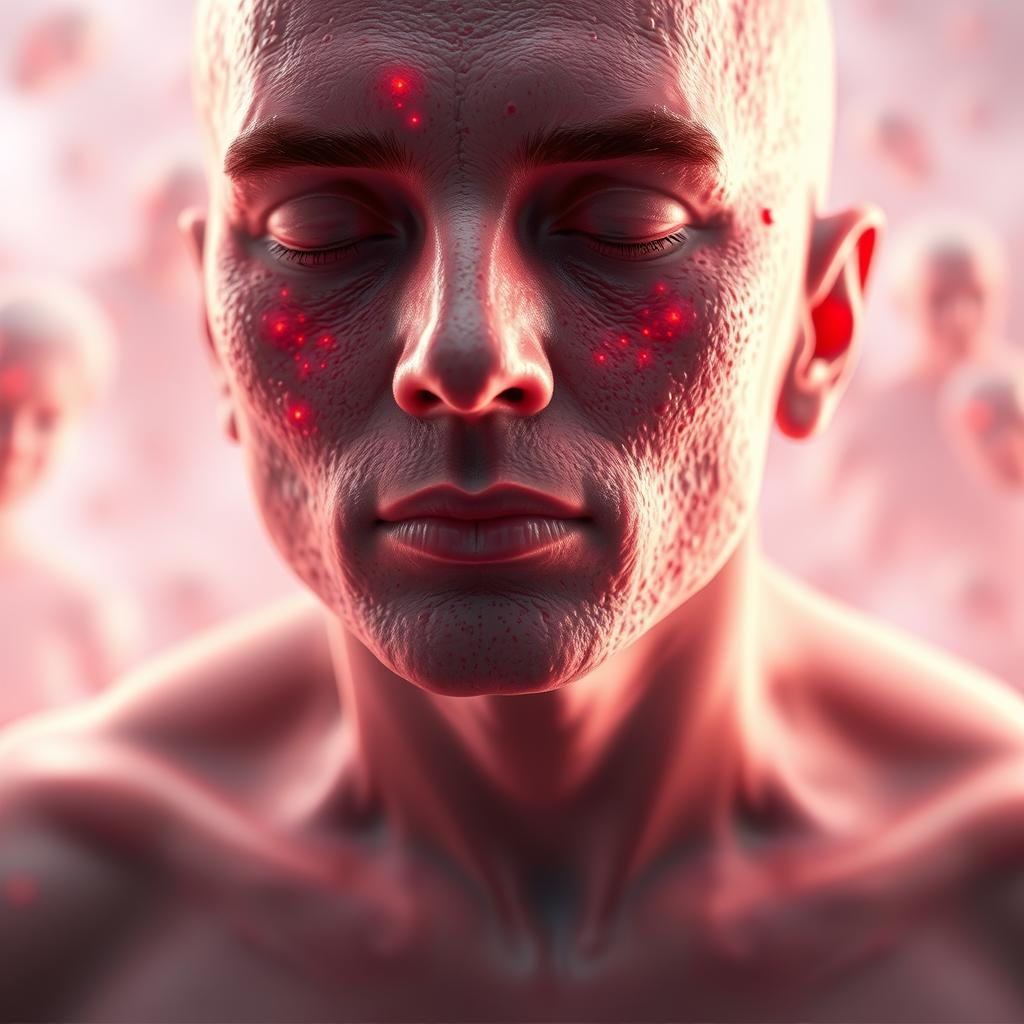

**Skin Cancer** is a critical health concern, with early detection being vital for effective treatment. In this project, we aim to classify skin lesions using machine learning models, leveraging both Convolutional Neural Networks (CNNs) and state-of-the-art transfer learning techniques.

**Baseline Model: CNN**

We start by building a CNN as our baseline model. The CNN architecture, with its ability to automatically learn hierarchical features from images, serves as a solid foundation. The model is trained on the skin cancer dataset, where it learns to identify different types of skin lesions. While CNNs are powerful, they often require extensive data and may struggle with complex patterns, leading us to explore more advanced models.

**Swin Transformer**

Next, we implement the Swin Transformer, a novel architecture that has shown remarkable success in vision tasks. By leveraging the self-attention mechanism, the Swin Transformer captures long-range dependencies in images, making it well-suited for skin cancer classification. We fine-tune a pre-trained Swin Transformer model on our dataset, expecting it to outperform the baseline CNN due to its advanced feature extraction capabilities.

**Transfer Learning with ResNet50**

Finally, we use ResNet50, a widely recognized deep learning model known for its residual connections that help in training deep networks. By employing transfer learning, we fine-tune a pre-trained ResNet50 model on the skin cancer dataset. ResNet50's ability to preserve the integrity of the gradients during backpropagation makes it a strong candidate for improving classification accuracy.

**Conclusion**

This approach allows us to compare the performance of a traditional CNN with cutting-edge transfer learning models like Swin Transformer and ResNet50. The results from this study will help us understand the trade-offs between different architectures and identify the most effective model for skin cancer classification. By harnessing the power of advanced deep learning techniques, we aim to contribute to more accurate and early detection of skin cancer, ultimately improving patient outcomes. Source: (Internet).

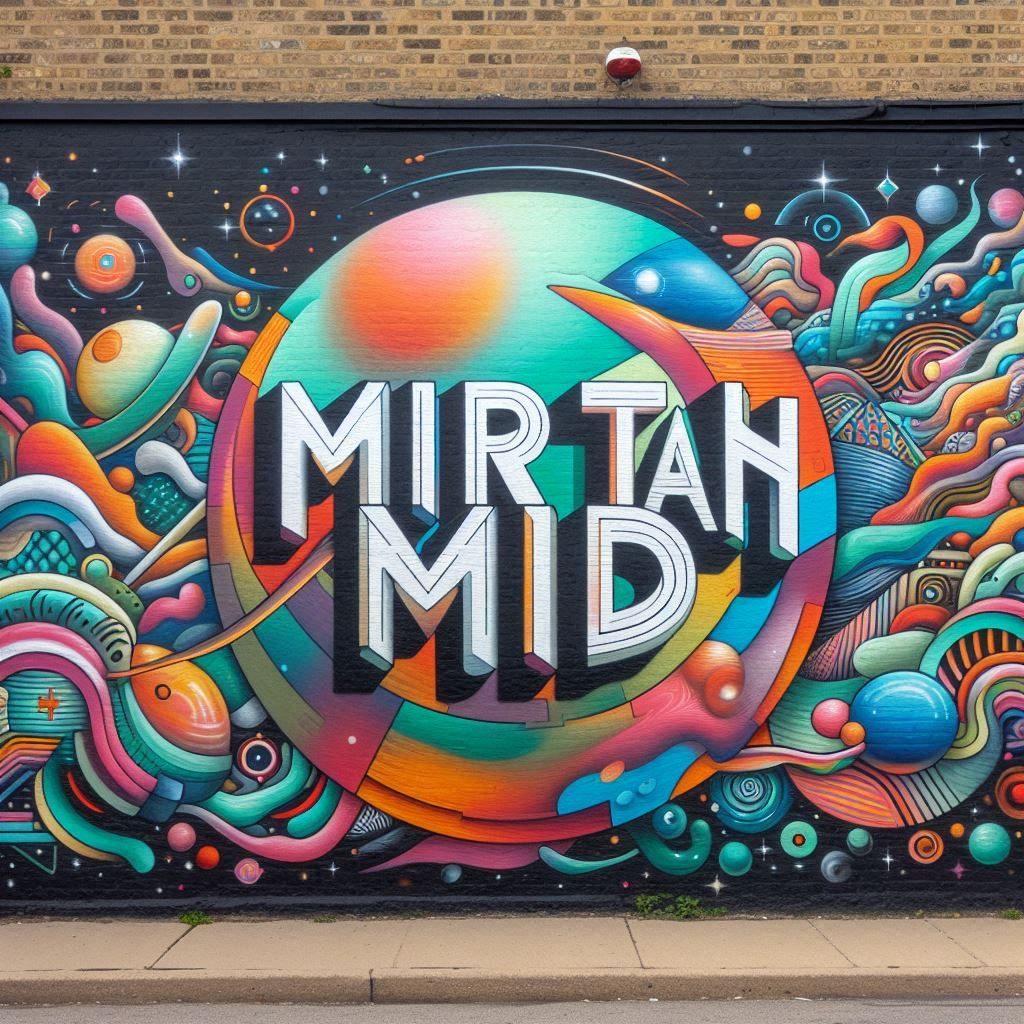

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>About Dataset</b></div>
     
**Skin Cancer: Malignant vs Benign**

**This dataset contains a balanced dataset of images of benign skin moles and malignant skin moles.**


**The data consists of two folders with each 1800 pictures (224x244) of the two types of moles.**

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Import Libraries, Loading Data and Visualization</b></div>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
data_dir = '/kaggle/input/skin-cancer-malignant-vs-benign'

# Image Data Generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Visualize some images from the train and validation datasets
def plot_images(generator, title):
    class_names = {v: k for k, v in train_generator.class_indices.items()}
    plt.figure(figsize=(12, 12))
    for i in range(9):
        img, label = next(generator)
        plt.subplot(3, 3, i+1)
        plt.imshow(img[0])
        plt.title(class_names[int(label[0])])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(train_generator, 'Train Dataset Samples')
plot_images(validation_generator, 'Test Dataset Samples')


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Train and Test Data Visualization</b></div>

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
train_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'
test_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'

# Function to plot images from a directory
def plot_images_from_directory(directory, title):
    class_names = os.listdir(directory)
    num_classes = len(class_names)

    plt.figure(figsize=(12, 12))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        image_path = os.path.join(class_dir, os.listdir(class_dir)[0])  # Take the first image from each class
        img = load_img(image_path, target_size=(224, 224))
        plt.subplot(2, num_classes, i + 1)
        plt.imshow(img)
        plt.title(f'Train: {class_name}')
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Visualize train dataset
plot_images_from_directory(train_dir, 'Train Dataset Samples')

# Visualize test dataset
plot_images_from_directory(test_dir, 'Test Dataset Samples')


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Let's build CNN as a Baseline Model</b></div>

**Convolutional Neural Networks (CNNs)** are a type of deep learning model that are particularly well-suited for processing and analyzing spatial data, such as images and videos. CNNs are designed to automatically learn and extract useful features from the input data, making them highly effective for tasks like image classification, object detection, and image segmentation.

The key components of a CNN architecture are:

**Convolutional Layers:** These layers apply a set of learnable filters (or kernels) to the input data, extracting local features and patterns. The filters are learned during the training process.

**Pooling Layers:** These layers reduce the spatial size of the feature maps, making the representation more manageable and invariant to small translations in the input.

**Fully Connected Layers:** These layers connect all neurons from the previous layer to produce the final output, such as class probabilities in a classification task.

Source: Internet


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Import Necessary Libraries</b></div>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Define Directories and Image Data Generators</b></div>

In [ ]:
# Define paths
train_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'
test_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/test'

# Image Data Generators with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Build and Train CNN Model</b></div>

In [ ]:
def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Build the model
model = build_cnn_model(input_shape=(224, 224, 3))
model.summary()

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Compile the Model</b></div>

In [ ]:
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Train the Model with Early Stopping</b></div>

In [ ]:
# Early stopping and model checkpoints
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_model_best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Evaluate the Model</b></div>

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Visualize Training History</b></div>

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Generate Confusion Matrix and Additional Metrics</b></div>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

def evaluate_model(model, generator):
    # Predict probabilities for test set
    y_pred_prob = model.predict(generator)
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)

    # Confusion Matrix
    cm = confusion_matrix(generator.classes, y_pred)
    class_names = list(generator.class_indices.keys())

    # Classification Report
    cr = classification_report(generator.classes, y_pred, target_names=class_names, output_dict=True)

    # ROC Curve
    fpr, tpr, _ = roc_curve(generator.classes, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot Confusion Matrix
    plot_confusion_matrix(cm, class_names)

    # Print Classification Report
    print('Classification Report:')
    for key, value in cr.items():
        if isinstance(value, dict):
            print(f'\nClass: {key}')
            for k, v in value.items():
                print(f'{k}: {v}')

# Evaluate the model
evaluate_model(model, validation_generator)


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Plot ROC Curve and Calculate AUC</b></div>

In [ ]:
def plot_roc_curve(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(model, validation_generator)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Building Swin Transformers</b></div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Define paths
train_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'
test_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'


# ImageDataGenerator for loading images
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Implement Swin Transformer architecture (simplified example)
def build_swin_transformer(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    # Implement Swin Transformer layers here
    # Example: Patch Embedding, Transformer Encoder Blocks, Classification Head
    # Replace with actual Swin Transformer implementation
    
    # Example Placeholder: Global average pooling
    x = GlobalAveragePooling2D()(inputs)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model

# Build and compile the Swin Transformer model
input_shape = (224, 224, 3)  # Adjust based on your dataset
num_classes = 2  # Adjust based on the number of classes (benign, malignant)
swin_transformer = build_swin_transformer(input_shape, num_classes)

swin_transformer.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=[CategoricalAccuracy(), Precision(), Recall()]
)

# Train the model
history = swin_transformer.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # Adjust epochs as needed
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy, test_precision, test_recall = swin_transformer.evaluate(test_generator)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')

# Confusion Matrix
test_predictions = swin_transformer.predict(test_generator)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = test_generator.classes

cm = confusion_matrix(test_true_classes, test_predicted_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Generating Data</b></div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'
test_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'

# ImageDataGenerator for loading images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess data
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Transfer Learning</b></div>

Transfer learning** is a machine learning technique that leverages knowledge gained from solving one problem and applies it to a different but related problem. The key idea behind transfer learning is to use the features or representations learned from a source task to improve the performance on a target task, especially when the target task has limited data or resources available.

The primary benefits of transfer learning include:

**Improved Performance:** By utilizing the knowledge gained from the source task, the model can achieve better performance on the target task, especially when the target task has limited data available.

**Faster Training:** Since the model has already learned useful features from the source task, the training process for the target task can be significantly faster compared to training the model from scratch.

**Reduced Data Requirements:** Transfer learning can be particularly useful when the target task has limited data available, as the model can leverage the knowledge from the source task to compensate for the lack of data.

**Applicability to Different Domains:** Transfer learning enables the application of models trained on one domain (e.g., image classification) to be applied to a different but related domain (e.g., object detection).
<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Load Pre-trained Model</b></div>

*Choosing a pre-trained model from TensorFlow Keras Applications (e.g., ResNet50, InceptionV3, EfficientNetB0, etc.). We choose **ResNet50.*

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Build Transfer Learning Model</b></div>
**Add custom classifier layers on top of the pre-trained base model.**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Add custom classifier layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Train the Transfer Learning Model</b></div>

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30  # Adjust epochs as needed
)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Evaluate the Model</b></div>

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Confusion Matrix</b></div>

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get raw predictions from the model
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Get true labels from the generator
y_true = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class names based on your generator class indices
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdGy", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>XGBoost</b></div>

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Define paths
train_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/train'
test_dir = '/kaggle/input/skin-cancer-malignant-vs-benign/test'

# Load ResNet50 model pre-trained on ImageNet, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Set up image data generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create a generator for the training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Extract features using ResNet50
features = base_model.predict(train_generator)
labels = train_generator.classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# If you'd like to plot feature importance
import matplotlib.pyplot as plt

# Plot feature importance with customization
plt.figure(figsize=(10, 8))
ax = xgb.plot_importance(xgb_model, importance_type='weight', color='skyblue', height=0.8)

# Customize the plot to make it colorful
ax.set_title('Feature Importance (XGBoost)', fontsize=16)
ax.set_xlabel('F-Score', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.grid(False)

# Set different colors for bars
for i, bar in enumerate(ax.patches):
    if i % 3 == 0:
        bar.set_color('skyblue')
    elif i % 3 == 1:
        bar.set_color('lightcoral')
    else:
        bar.set_color('lightgreen')

plt.show()



<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Conclusion Note</b></div>

The **XGBoost** model achieved an accuracy of 89% for skin cancer classification. This demonstrates the model's strong capability in distinguishing between malignant and benign skin lesions when combined with features extracted from ResNet50. With further hyperparameter tuning and possibly integrating additional data or advanced feature engineering, the model's performance could be further enhanced.

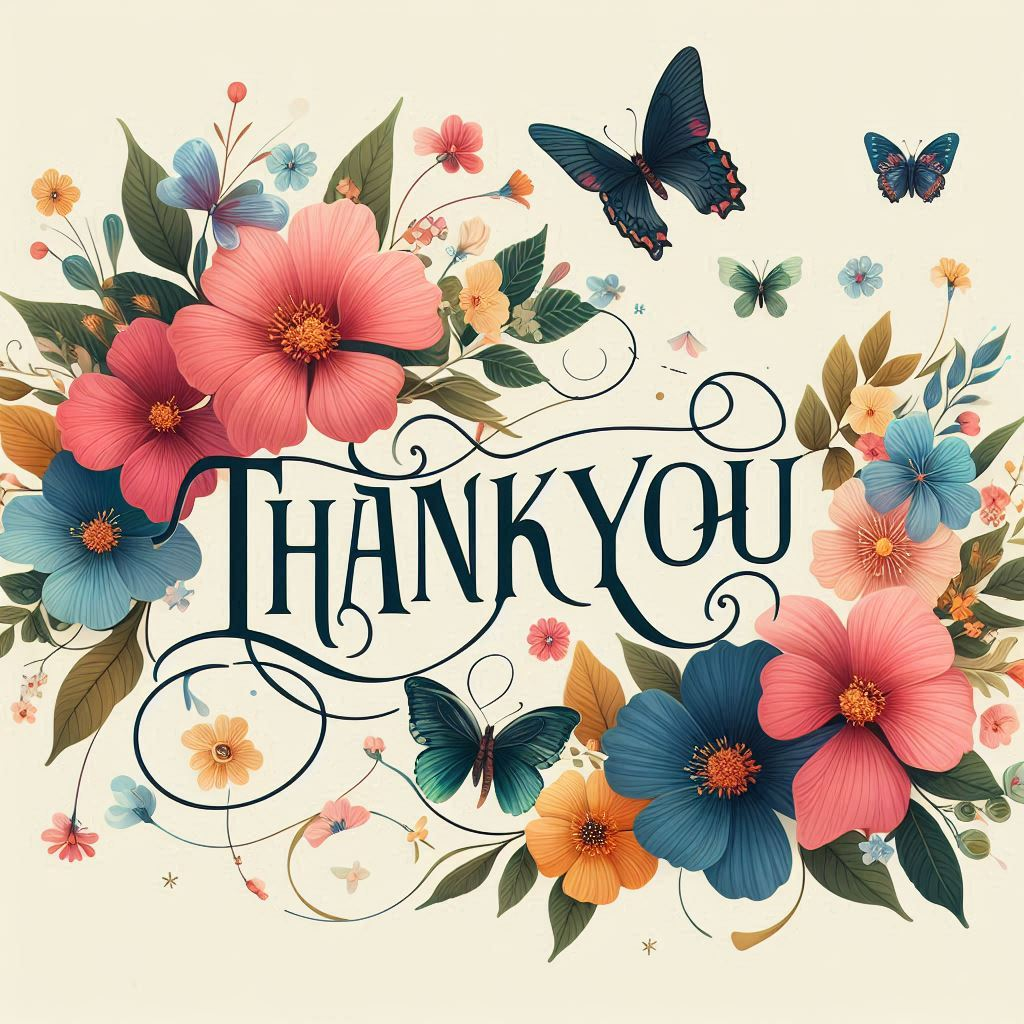

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#f0b0b0; overflow:hidden"><b>Thank You</b></div>